In [1]:
import pynini

pynini.cdrewrite()
    
pynini.concat()
pynini.compose()
pynini.invert()
pynini.shortestpath()
pynini.union()
pynini.Fst.closure()
pynini.Fst.num_states()
pynini.Fst.optimize()
pynini.Fst.project()
pynini.Fst.string()


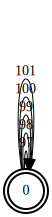

In [2]:
sigma_star = pynini.union("a", "b", "c", "d", "e").closure().optimize()
sigma_star

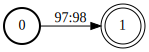

In [3]:
tau = pynini.transducer("a", "b")
tau

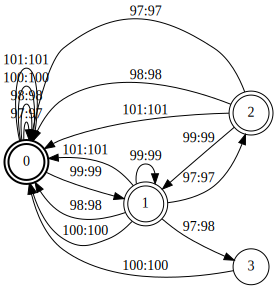

In [5]:
#pynini.cdrewrite(transducer_rule, before_evnirovnment, after_environment, closure_set)
rule = pynini.cdrewrite(tau, "c", "d", sigma_star).optimize()
rule

In [6]:
def apply(string: str, rule: pynini.Fst) -> str:
    return (string @ rule).string()

In [9]:
#no change because the environment is different
apply("cab", rule)

'cab'

In [8]:
apply("cad", rule)

'cbd'

American English

In [12]:
import string

#closure out of not just five letters, but all ascii alphabet
sigma_star = pynini.union(*string.ascii_lowercase).optimize().closure().optimize()
#sigma_star

In [13]:
rule_form1 = pynini.cdrewrite(pynini.transducer("ise", "ize"),
                              "",
                              "[EOS]",  # End of string special character.
                              sigma_star).optimize()
apply("colorise", rule_form1)

'colorize'

In [14]:
rule_form2 = pynini.cdrewrite(pynini.transducer("s", "z"),
                              "i",
                              "e",
                              sigma_star).optimize()
apply("optimise", rule_form2)

'optimize'

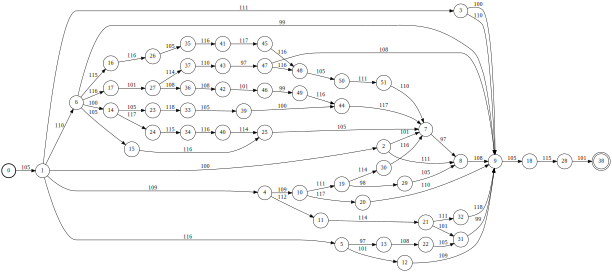

In [15]:
wordlist = ['idealise', 'idolise', 'immobilise', 'immortalise', 'immunise',
             'imprecise', 'improvise', 'incise', 'individualise', 'industrialise',
             'initialise', 'institutionalise', 'intellectualise', 'internalise',
            'internationalise', 'iodise', 'ionise', 'italicise', 'itemise']

#to produce a FSA out of a list
british_words = pynini.union(*wordlist).optimize()  #add * for the entirety, error otherwise
british_words

In [16]:
to_american = british_words @ rule_form2   #@ = apply, as in apply a rule to a set/lsit
american_words = list(to_american.paths().ostrings())
american_words

['idealize',
 'idolize',
 'immobilize',
 'immortalize',
 'immunize',
 'imprecize',
 'improvize',
 'incize',
 'individualize',
 'industrialize',
 'initialize',
 'institutionalize',
 'intellectualize',
 'internalize',
 'internationalize',
 'iodize',
 'ionize',
 'italicize',
 'itemize']

ADD .d

In [17]:
add_d = pynini.cdrewrite(pynini.transducer("", "d"),
                         "",
                         "[EOS]",
                         sigma_star).optimize()
#to produce an FST => apply a rule to an FSA
to_past = british_words @ add_d
#to output the FST to a list => take FST, apply paths() to get all paths, and ostrings() to output strings
british_past_words = list(to_past.paths().ostrings())
british_past_words

['idealised',
 'idolised',
 'immobilised',
 'immortalised',
 'immunised',
 'imprecised',
 'improvised',
 'incised',
 'individualised',
 'industrialised',
 'initialised',
 'institutionalised',
 'intellectualised',
 'internalised',
 'internationalised',
 'iodised',
 'ionised',
 'italicised',
 'itemised']

In [19]:
to_american_past = british_words @ add_d @ rule_form2
#to_american_past
american_past_words = list(to_american_past.paths().ostrings())
american_past_words

['idealized',
 'idolized',
 'immobilized',
 'immortalized',
 'immunized',
 'imprecized',
 'improvized',
 'incized',
 'individualized',
 'industrialized',
 'initialized',
 'institutionalized',
 'intellectualized',
 'internalized',
 'internationalized',
 'iodized',
 'ionized',
 'italicized',
 'itemized']

In [ ]:

@char ngrams OpenGrm
#farcompilestrings --far_type=compact_string --token_type=byte news_small.txt news_small.char.far